## 0. Importing necessary libraries,<br> Creating a folder for storing python scripts,<br> Setting up device-agnostic code

Since we're going to be creating Python scripts out of our most useful code cells, let's create a folder for storing those scripts.

We'll call the folder `TinyVGG_pytorch` and create it using Python's [`os.makedirs()`](https://docs.python.org/3/library/os.html) method.

In [1]:
import os
import torch
from torch import nn

torch.__version__

'2.0.0'

Creating a folder for python scripts

In [2]:
# os.makedirs("going_modular", exist_ok=True)

Setting up device-agnostic code

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# temp = torch.cuda.device_count()
# temp
# torch.cuda.get_device_capability()


# import psutil
# psutil.cpu_count(logical=False)

'cuda'

# **0. Data Preparation**

In [4]:
# import os
# import zipfile

# from pathlib import Path
# import random
# import shutil
# from shutil import copyfile

# import requests
# import pandas as pd

# # Setup path to data folder
# data_path = Path("/kaggle/input/ham10000/HAM10000")
# # image_path = data_path / "Retinal_image_Aptos_Eyepacs_splitted" # FOLDER path = splitted dataset into Train & Test
# # image_path_all = data_path / "15 test test" # FOLDER path = not yet splitted dataset
# classes_dir = Path("/kaggle/working/Classes")
# csv_location = data_path/'HAM10000_metadata.csv'

In [5]:
# # tasks -
# #          1. taking the "train" folder images into "____all" folder using train.csv with making no of folder-classes inside it

# import shutil
# from tqdm import tqdm

# df_train_csv = pd.read_csv(csv_location)
# # print(df_train_csv.columns)
# class_names = df_train_csv['dx'].unique()
# print(df_train_csv['dx'].value_counts())


# # COMMENT IT IF MAKING DIRECTORIES && NOT COPYING----------(train)-------------------

# ## making directories according to no of classes
# if not os.path.exists(classes_dir):
#     os.makedirs(classes_dir)
    
# for i in range(len(class_names)):
#     name = class_names[i]
#     os.makedirs(f'{classes_dir}/{name}', exist_ok=True)  




# # # taking images from train folder --> __all forder's class folder
# for i in tqdm(range(len(df_train_csv))):
#     image_name = df_train_csv["image_id"][i]
#     class_name = df_train_csv["dx"][i]
#     source_path =  data_path/"Images"/f"{image_name}.jpg"
#     destination =  classes_dir/f"{class_name}"
#     shutil.copy(source_path, destination)
# #     print(os.access(destination, os.W_OK))

# # COMMENT IT IF NOT COPYING--------------------------------(train)-------------------



In [6]:
# # Split the dataset if not splitted into - "Retinal_image_splitted" folder

# source_path = classes_dir
# source_path_class_based_list = []

# for i in range(len(class_names)):
#     source_path_class_based_list.append(os.path.join(source_path, f"{class_names[i]}"))

# # # Deletes all non-image files (there are two .db files bundled into the dataset)
# # # !find / tmp/PetImages / -type f ! -name "*.jpg" -exec rm {} +

# for i in range(len(class_names)):
#     print(f"There are {len(os.listdir(source_path_class_based_list[i]))} images of Class {class_names[i]}")

In [7]:
# # Define root directory
# if not os.path.exists('/kaggle/working/Splitted'):
#     os.makedirs(Path('/kaggle/working/Splitted'))
    
# root_dir = Path('/kaggle/working/Splitted')

# # Empty directory to prevent FileExistsError is the function is run several times
# if os.path.exists(root_dir):
#     shutil.rmtree(f"{root_dir}/")

# # GRADED FUNCTION: create_train_val_dirs


# def create_train_val_dirs(root_path, class_names):
#     """
#     Creates directories for the train and test sets

#     Args:
#       root_path (string) - the base directory path to create subdirectories from

#     Returns:
#       None
#     """
#     # START CODE HERE

#     # HINT:
#     # Use os.makedirs to create your directories with intermediate subdirectories
#     # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

#     import os

#     training_dir = os.path.join(root_dir, "train")
#     testing_dir = os.path.join(root_dir, "test")
    
#     if not (os.path.exists(training_dir) and os.path.exists(testing_dir)):
#         os.makedirs(training_dir)
#         os.makedirs(testing_dir)
    
    
#     training_dir_classes_list = []
    
#     for i in range(len(class_names)):
#         path_train = os.path.join(training_dir, f"{class_names[i]}")
#         if not os.path.exists(path_train):
#             os.makedirs(path_train)
        
#         path_test = os.path.join(testing_dir, f"{class_names[i]}")
#         if not os.path.exists(path_test):
#             os.makedirs(path_test)

#     return training_dir, testing_dir
#     # END CODE HERE


# try:
#     training_dir, testing_dir = create_train_val_dirs(root_path=root_dir, 
#                                                       class_names=class_names)
# except FileExistsError:
#     print("You should not be seeing this since the upper directory is removed beforehand")


In [8]:
# # Test your create_train_val_dirs function

# for rootdir, dirs, files in os.walk(root_dir):
#     for subdir in dirs:
#         print(os.path.join(rootdir, subdir))

In [9]:
# # GRADED FUNCTION: split_data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     """
#     Splits the data into train and test sets

#     Args:
#       SOURCE_DIR (string): directory path containing the images
#       TRAINING_DIR (string): directory path to be used for training
#       VALIDATION_DIR (string): directory path to be used for validation
#       SPLIT_SIZE (float): proportion of the dataset to be used for training

#     Returns:
#       None
#     """

#     # START CODE HERE

#     contents_source_dir = os.listdir(SOURCE_DIR)
#     contents_source_dir = random.sample(contents_source_dir, len(contents_source_dir))

#     training_number = int(len(contents_source_dir) * SPLIT_SIZE)
#     target_dir = TRAINING_DIR

#     for index in range(len(contents_source_dir)):
#         if os.path.getsize(os.path.join(SOURCE_DIR, contents_source_dir[index])) == 0:
#             print(f"{contents_source_dir[index]} is zero length, so ignoring.")
#         else:
#             copyfile(os.path.join(SOURCE_DIR, contents_source_dir[index]), os.path.join(target_dir, contents_source_dir[index]))

#         if index == training_number:
#             target_dir = VALIDATION_DIR

#     # END CODE HERE


In [10]:
# # Empty directories in case you run this cell multiple times
# # if len(os.listdir(training_Healthy_dir)) > 0:
# #     for file in os.scandir(training_Healthy_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Mild_DR_dir)) > 0:
# #     for file in os.scandir(training_Mild_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Moderate_DR_dir)) > 0:
# #     for file in os.scandir(training_Moderate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Proliferate_DR_dir)) > 0:
# #     for file in os.scandir(training_Proliferate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Severe_DR_dir)) > 0:
# #     for file in os.scandir(training_Severe_DR_dir):
# #         os.remove(file.path)




# # if len(os.listdir(testing_Healthy_dir)) > 0:
# #     for file in os.scandir(testing_Healthy_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Mild_DR_dir)) > 0:
# #     for file in os.scandir(testing_Mild_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Moderate_DR_dir)) > 0:
# #     for file in os.scandir(testing_Moderate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Proliferate_DR_dir)) > 0:
# #     for file in os.scandir(testing_Proliferate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Severe_DR_dir)) > 0:
# #     for file in os.scandir(testing_Severe_DR_dir):
# #         os.remove(file.path)

# # Define proportion of images used for training
# split_size = .8

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# for i in tqdm(range(len(class_names))):
#     source_path = os.path.join(classes_dir, f"{class_names[i]}")
#     train_path = os.path.join(training_dir, f"{class_names[i]}")
#     test_path = os.path.join(testing_dir, f"{class_names[i]}")
    
#     split_data(source_path, train_path, test_path, split_size)


# # Check that the number of images matches the expected output

# # # Your function should perform copies rather than moving images so original directories should contain unchanged images
# # print(f"\n\nOriginal Healthy directory has {len(os.listdir(source_path_Healthy))} images")
# # print(f"Original Mild DR directory has {len(os.listdir(source_path_Mild_DR))} images")
# # print(f"Original Moderate DR directory has {len(os.listdir(source_path_Moderate_DR))} images")
# # print(f"Original Proliferate DR directory has {len(os.listdir(source_path_Proliferate_DR))} images")
# # print(f"Original Severe DR directory has {len(os.listdir(source_path_Severe_DR))} images\n")

# # # Training and validation splits
# # print(f"There are {len(os.listdir(training_Healthy_dir))} images of Healthy for training")
# # print(f"There are {len(os.listdir(training_Mild_DR_dir))} images of Mild DR for training")
# # print(f"There are {len(os.listdir(training_Moderate_DR_dir))} images of Moderate DR for training")
# # print(f"There are {len(os.listdir(training_Proliferate_DR_dir))} images of Proliferate DR for training")
# # print(f"There are {len(os.listdir(training_Severe_DR_dir))} images of Severe for training\n\n")

# # print(f"There are {len(os.listdir(testing_Healthy_dir))} images of Healthy for Validation")
# # print(f"There are {len(os.listdir(testing_Mild_DR_dir))} images of Mild DR for Validation")
# # print(f"There are {len(os.listdir(testing_Moderate_DR_dir))} images of Moderate DR for Validation")
# # print(f"There are {len(os.listdir(testing_Proliferate_DR_dir))} images of Proliferate DR for Validation")
# # print(f"There are {len(os.listdir(testing_Severe_DR_dir))} images of Severe for Validation")

# **Gaussian Filter**

In [11]:
# ! pip install imutils

In [12]:
# import os
# from pathlib import Path
# import imutils
# import cv2
# from tqdm.auto import tqdm

# sigmaX = 10

# rootdir = Path("/kaggle/input/ham10000-splitted/Images splitted/Splitted/train/mel")
# savedir = Path("/kaggle/working/splitted/train/mel")

# if not os.path.exists(savedir):
#     os.makedirs(savedir)

# for rootdir, dirs, files in os.walk(rootdir):
#     print(rootdir)
#     for file in tqdm(files):
#         try:
#             read_path = os.path.join(rootdir, file)
#             write_path = f"{savedir}/{file}"
#             image = cv2.imread(read_path)
#             image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0,0), sigmaX), -4, 128)
#             # gaussian = cv2.resize(image, (224,224))
#             # gaussian = imutils.resize(image, height=224)
#             cv2.imwrite(write_path, image)
#         except:
#             print("...")

# **1. Get data**


Data might be downloaded as splitted (ready-made) or not. If not, we need to take care of it by splitting by ourself own <br>
If the image folder doesn't exist, download it as "Retinal_image_all folder" and prepare it... 

In [13]:
import os
import zipfile

from pathlib import Path
import random
import shutil
from shutil import copyfile

import requests
import pandas as pd

# Setup path to data folder
data_path = Path("/kaggle/input/ham10000-splitted/Images splitted/Splitted")
image_path = data_path # FOLDER path = splitted dataset into Train & Test
# image_path_all = data_path / "all" # FOLDER path = not yet splitted dataset



# # If the image folder doesn't exist, download it as "Retinal_image_all folder" and prepare it... 



# if image_path.is_dir():
#     print(f"{image_path} directory exists.")
# else:
#     print(f"Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)
    
# # Download pizza, steak, sushi data
# with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#     print("Downloading pizza, steak, sushi data...")
#     f.write(request.content)

# # Unzip pizza, steak, sushi data
# with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
#     print("Unzipping pizza, steak, sushi data...") 
#     zip_ref.extractall(image_path)

# # Remove zip file
# os.remove(data_path / "pizza_steak_sushi.zip")

### (If necessary) Preparing the dataset into class-folders using csv info - maybe splitting isn't necessary when we have "train.csv" and "test.csv"

In [14]:
## tasks -
##          1. taking the "train" folder images into "____all" folder using train.csv with making no of folder-classes inside it

# import shutil

# csv_location = data_path / "train.csv"
# # csv_location_test = data_path / "test.csv"

# df_train_csv = pd.read_csv(csv_location)
# # df_test_csv = pd.read_csv(csv_location_test)

# class_names = df_train_csv['diagnosis'].unique()


# COMMENT IT IF MAKING DIRECTORIES && NOT COPYING----------(train)-------------------

# ## making directories according to no of classes
# for i in range(len(class_names)):
#     name = class_names[i]
#     os.makedirs(f'{image_path_all}/{name}', exist_ok=True)  




# ## taking images from train folder --> __all forder's class folder
# for i in range(len(df_train_csv)):
#     image_name = df_train_csv["id_code"][i]
#     class_name = df_train_csv["diagnosis"][i]
#     source_path = data_path / "train_images" / f"{image_name}.png"
#     destination = image_path_all/ f"{class_name}"/ f"{image_name}.png"
#     shutil.copyfile(source_path, destination)

# COMMENT IT IF NOT COPYING--------------------------------(train)-------------------




In [15]:
# no of samples per class

# classes = os.listdir(image_path_all)
# classes_no_of_data_dict = {}

# for i in range(len(classes)):
#     classes_no_of_data_dict[classes[i]] = len(os.listdir(image_path_all/classes[i]))

# classes_no_of_data_dict






## When you only upload splitted folder
classes = os.listdir(f'{image_path}/train')
classes_no_of_data_dict = {}
# classes.remove("desktop.ini")
classes

for i in range(len(classes)):
    classes_no_of_data_dict[classes[i]] = len(os.listdir(f'{image_path}/train/{classes[i]}'))
    
for i in range(len(classes)):
    temp = len(os.listdir(f'{image_path}/test/{classes[i]}'))
    classes_no_of_data_dict[classes[i]] = classes_no_of_data_dict[classes[i]] + temp

classes_no_of_data_dict

{'mel': 1113,
 'vasc': 142,
 'df': 115,
 'nv': 6705,
 'bkl': 1099,
 'akiec': 327,
 'bcc': 514}

 ### If dataset balanced or not?
 <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
">Matplotlib documentation - plotting categorical values</a>


```Python
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
```

Text(0.5, 0.98, 'Categorical Plotting')

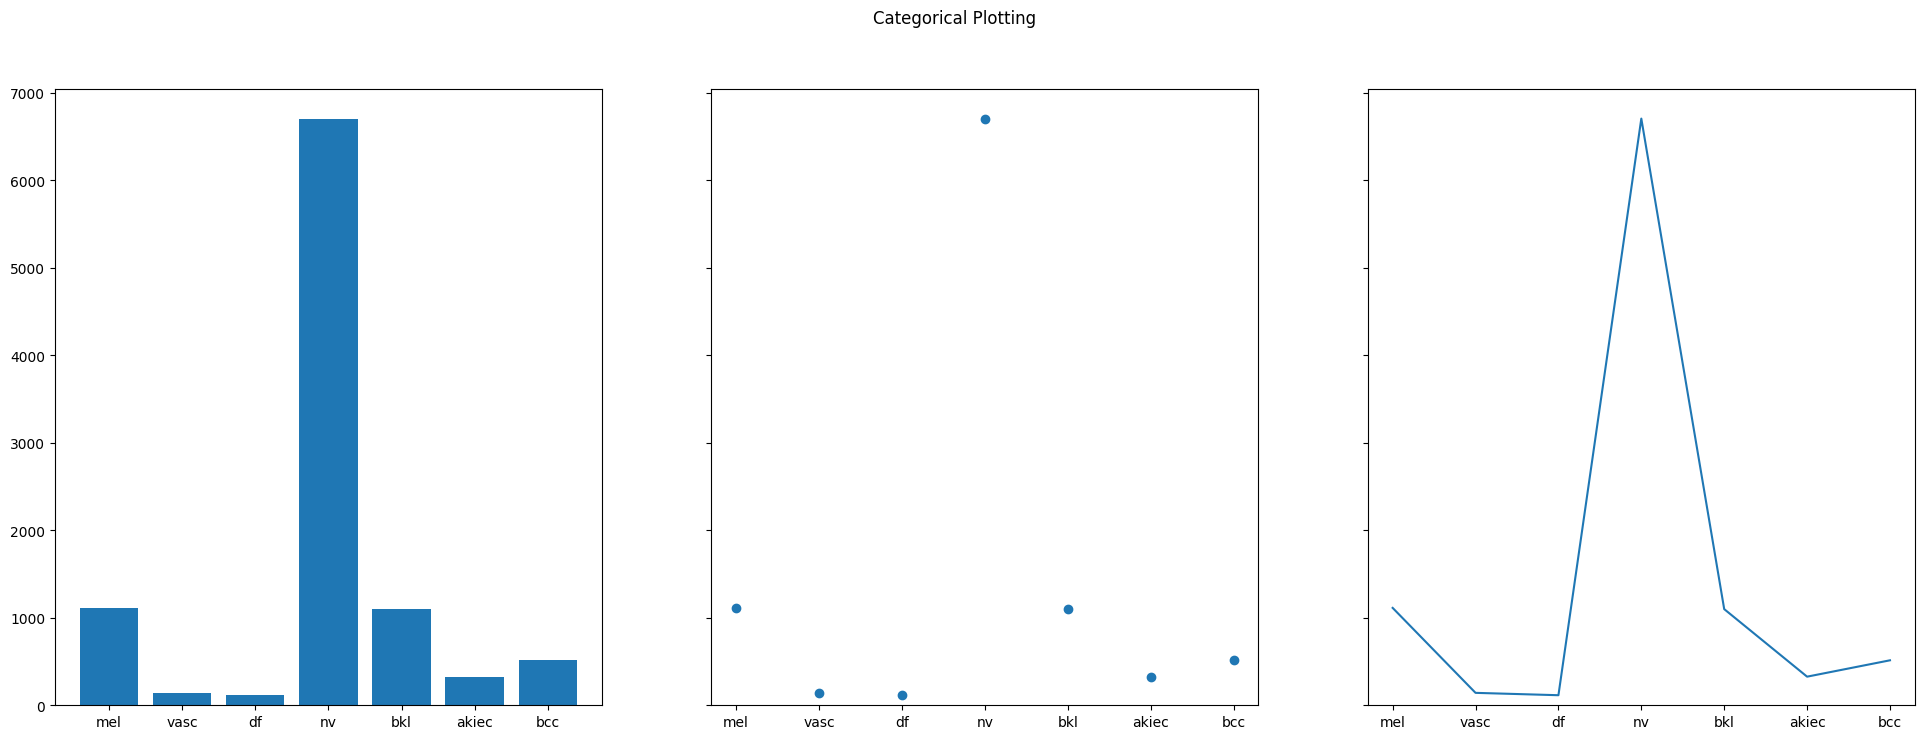

In [16]:
import matplotlib.pyplot as plt


data = classes_no_of_data_dict
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

### Splitting

Data Description 

<ul>
    <li> 0 - No DR </li>
    <li> 1 - Mild </li>
    <li> 2 - Moderate </li>
    <li> 3 - Severe </li>
    <li> 4 - Proliferative DR </li>
<ul>

In [17]:
# # Split the dataset if not splitted into - "Retinal_image_splitted" folder

# source_path = image_path_all
# print(source_path)

# source_path_Healthy = os.path.join(source_path, 'Healthy')
# source_path_Mild_DR = os.path.join(source_path, 'Mild_DR')
# source_path_Moderate_DR = os.path.join(source_path, 'Moderate_DR')
# source_path_Proliferate_DR = os.path.join(source_path, 'Proliferate_DR')
# source_path_Severe_DR = os.path.join(source_path, 'Severe_DR')

# # Deletes all non-image files (there are two .db files bundled into the dataset)
# # !find / tmp/PetImages / -type f ! -name "*.jpg" -exec rm {} +

# # os.listdir returns a list containing all files under the given path
# print(f"There are {len(os.listdir(source_path_Healthy))} images of Healthy retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Mild_DR))} images of Mild DR retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Moderate_DR))} images of Moderate DR retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Proliferate_DR))} images of Proliferate DR retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Severe_DR))} images of Severe DR retinal fundus images.")

In [18]:
# # Define root directory
# root_dir = image_path

# # # Empty directory to prevent FileExistsError is the function is run several times
# # if os.path.exists(root_dir):
# #     shutil.rmtree(root_dir)

# # # GRADED FUNCTION: create_train_val_dirs


# def create_train_val_dirs(root_path):
#     """
#     Creates directories for the train and test sets

#     Args:
#       root_path (string) - the base directory path to create subdirectories from

#     Returns:
#       None
#     """
#     # START CODE HERE

#     # HINT:
#     # Use os.makedirs to create your directories with intermediate subdirectories
#     # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

#     import os

#     training_dir = os.path.join(root_dir, "train")
#     testing_dir = os.path.join(root_dir, "test")
#     os.makedirs(training_dir)
#     os.makedirs(testing_dir)

#     training_Healthy_dir = os.path.join(training_dir, "Healthy")
#     training_Mild_DR_dir = os.path.join(training_dir, "Mild_DR")
#     training_Moderate_DR_dir = os.path.join(training_dir, "Moderate_DR")
#     training_Proliferate_DR_dir = os.path.join(training_dir, "Proliferate_DR")
#     training_Severe_DR_dir = os.path.join(training_dir, "Severe_DR")
#     os.makedirs(training_Healthy_dir)
#     os.makedirs(training_Mild_DR_dir)
#     os.makedirs(training_Moderate_DR_dir)
#     os.makedirs(training_Proliferate_DR_dir)
#     os.makedirs(training_Severe_DR_dir)

#     testing_Healthy_dir = os.path.join(testing_dir, "Healthy")
#     testing_Mild_DR_dir = os.path.join(testing_dir, "Mild_DR")
#     testing_Moderate_DR_dir = os.path.join(testing_dir, "Moderate_DR")
#     testing_Proliferate_DR_dir = os.path.join(testing_dir, "Proliferate_DR")
#     testing_Severe_DR_dir = os.path.join(testing_dir, "Severe_DR")
#     os.makedirs(testing_Healthy_dir)
#     os.makedirs(testing_Mild_DR_dir)
#     os.makedirs(testing_Moderate_DR_dir)
#     os.makedirs(testing_Proliferate_DR_dir)
#     os.makedirs(testing_Severe_DR_dir)

#     return training_dir, testing_dir, training_Healthy_dir, training_Mild_DR_dir, training_Moderate_DR_dir, training_Proliferate_DR_dir, training_Severe_DR_dir, testing_Healthy_dir, testing_Mild_DR_dir, testing_Moderate_DR_dir, testing_Proliferate_DR_dir, testing_Severe_DR_dir
#     # END CODE HERE


# try:
#     training_dir, testing_dir, training_Healthy_dir, training_Mild_DR_dir, training_Moderate_DR_dir, training_Proliferate_DR_dir, training_Severe_DR_dir, testing_Healthy_dir, testing_Mild_DR_dir, testing_Moderate_DR_dir, testing_Proliferate_DR_dir, testing_Severe_DR_dir = create_train_val_dirs(root_path=root_dir)
# except FileExistsError:
#     print("You should not be seeing this since the upper directory is removed beforehand")


In [19]:
# # Test your create_train_val_dirs function

# for rootdir, dirs, files in os.walk(root_dir):
#     for subdir in dirs:
#         print(os.path.join(rootdir, subdir))

In [20]:
# # GRADED FUNCTION: split_data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     """
#     Splits the data into train and test sets

#     Args:
#       SOURCE_DIR (string): directory path containing the images
#       TRAINING_DIR (string): directory path to be used for training
#       VALIDATION_DIR (string): directory path to be used for validation
#       SPLIT_SIZE (float): proportion of the dataset to be used for training

#     Returns:
#       None
#     """

#     # START CODE HERE

#     contents_source_dir = os.listdir(SOURCE_DIR)
#     contents_source_dir = random.sample(contents_source_dir, len(contents_source_dir))

#     training_number = int(len(contents_source_dir) * SPLIT_SIZE)
#     target_dir = TRAINING_DIR

#     for index in range(len(contents_source_dir)):
#         if os.path.getsize(os.path.join(SOURCE_DIR, contents_source_dir[index])) == 0:
#             print(f"{contents_source_dir[index]} is zero length, so ignoring.")
#         else:
#             copyfile(os.path.join(SOURCE_DIR, contents_source_dir[index]), os.path.join(target_dir, contents_source_dir[index]))

#         if index == training_number:
#             target_dir = VALIDATION_DIR

#     # END CODE HERE


In [21]:
# # Empty directories in case you run this cell multiple times
# if len(os.listdir(training_Healthy_dir)) > 0:
#     for file in os.scandir(training_Healthy_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Mild_DR_dir)) > 0:
#     for file in os.scandir(training_Mild_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Moderate_DR_dir)) > 0:
#     for file in os.scandir(training_Moderate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Proliferate_DR_dir)) > 0:
#     for file in os.scandir(training_Proliferate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Severe_DR_dir)) > 0:
#     for file in os.scandir(training_Severe_DR_dir):
#         os.remove(file.path)




# if len(os.listdir(testing_Healthy_dir)) > 0:
#     for file in os.scandir(testing_Healthy_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Mild_DR_dir)) > 0:
#     for file in os.scandir(testing_Mild_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Moderate_DR_dir)) > 0:
#     for file in os.scandir(testing_Moderate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Proliferate_DR_dir)) > 0:
#     for file in os.scandir(testing_Proliferate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Severe_DR_dir)) > 0:
#     for file in os.scandir(testing_Severe_DR_dir):
#         os.remove(file.path)





# # Define proportion of images used for training
# split_size = .8

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# split_data(source_path_Healthy, training_Healthy_dir, testing_Healthy_dir, split_size)
# split_data(source_path_Mild_DR, training_Mild_DR_dir, testing_Mild_DR_dir, split_size)
# split_data(source_path_Moderate_DR, training_Moderate_DR_dir, testing_Moderate_DR_dir, split_size)
# split_data(source_path_Proliferate_DR, training_Proliferate_DR_dir, testing_Proliferate_DR_dir, split_size)
# split_data(source_path_Severe_DR, training_Severe_DR_dir, testing_Severe_DR_dir, split_size)

# # Check that the number of images matches the expected output

# # Your function should perform copies rather than moving images so original directories should contain unchanged images
# print(f"\n\nOriginal Healthy directory has {len(os.listdir(source_path_Healthy))} images")
# print(f"Original Mild DR directory has {len(os.listdir(source_path_Mild_DR))} images")
# print(f"Original Moderate DR directory has {len(os.listdir(source_path_Moderate_DR))} images")
# print(f"Original Proliferate DR directory has {len(os.listdir(source_path_Proliferate_DR))} images")
# print(f"Original Severe DR directory has {len(os.listdir(source_path_Severe_DR))} images\n")

# # Training and validation splits
# print(f"There are {len(os.listdir(training_Healthy_dir))} images of Healthy for training")
# print(f"There are {len(os.listdir(training_Mild_DR_dir))} images of Mild DR for training")
# print(f"There are {len(os.listdir(training_Moderate_DR_dir))} images of Moderate DR for training")
# print(f"There are {len(os.listdir(training_Proliferate_DR_dir))} images of Proliferate DR for training")
# print(f"There are {len(os.listdir(training_Severe_DR_dir))} images of Severe for training\n\n")

# print(f"There are {len(os.listdir(testing_Healthy_dir))} images of Healthy for Validation")
# print(f"There are {len(os.listdir(testing_Mild_DR_dir))} images of Mild DR for Validation")
# print(f"There are {len(os.listdir(testing_Moderate_DR_dir))} images of Moderate DR for Validation")
# print(f"There are {len(os.listdir(testing_Proliferate_DR_dir))} images of Proliferate DR for Validation")
# print(f"There are {len(os.listdir(testing_Severe_DR_dir))} images of Severe for Validation")

##### Splitting process ends here.....................

In [22]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/kaggle/input/ham10000-splitted/Images splitted/Splitted/train'),
 PosixPath('/kaggle/input/ham10000-splitted/Images splitted/Splitted/test'))

# **Datasets and DataLoaders**

Let's turn our data into PyTorch `Dataset`'s and `DataLoader`'s and find out a few useful attributes from them such as `classes` and their lengths. 

In [23]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode

# Create image size (from Table 3 in the ViT paper) 
# IMG_SIZE = 224
# IMG_SIZE = 64
IMG_SIZE = 56

# Create transform pipeline manually   
data_transform = transforms.Compose([
#     transforms.CenterCrop(200),
#     transforms.RandAugment(num_ops = 8, 
#                            magnitude = 9, 
#                            num_magnitude_bins = 31, 
#                            interpolation = InterpolationMode.BILINEAR, 
#                            ),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.RandomRotation((-120,120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
#     transforms.RandomAffine(degrees=360, scale=(1.0, 1.3)),
#     transforms.RandomAdjustSharpness(sharpness_factor=0),
#     transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.RandomPerspective(distortion_scale=0.2),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    
    # Calculated for train data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])     

print(f"Manually created transforms: {data_transform}")





data_transform_test = transforms.Compose([
#     transforms.CenterCrop(200),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # Kaggle winner : https://www.kaggle.com/competitions/aptos2019-blindness-detection/discussion/107954
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),

    # Calculated for test data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])  


# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform_test,
                                )

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Manually created transforms: Compose(
    Resize(size=(56, 56), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    RandomRotation(degrees=[-120.0, 120.0], interpolation=nearest, expand=False, fill=0)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomPerspective(p=0.5)
    Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
)
Train data:
Dataset ImageFolder
    Number of datapoints: 8017
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(56, 56), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomRotation(degrees=[-120.0, 120.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomPerspective(p=0.5)
               Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0

# **Auto Transform**

In [24]:
# import torchvision

# # Get a set of pretrained model weights
# weights = torchvision.models.EfficientNet_B5_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
# # Get the transforms used to create our pretrained weights
# auto_transforms = weights.transforms()


# from torchvision import datasets, transforms

# # Use ImageFolder to create dataset(s)
# train_data2 = datasets.ImageFolder(root=train_dir, # target folder of images
#                                   transform=auto_transforms, # transforms to perform on data (images)
#                                   target_transform=None) # transforms to perform on labels (if necessary)

# test_data2 = datasets.ImageFolder(root=test_dir, 
#                                  transform=auto_transforms)

# print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

In [25]:
# Get class names as a list
class_names = train_data.classes
class_names

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [26]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [27]:
weights = []

for (X,y) in train_data:
    if y == 0:
        weights.append(1.0/262)

    if y == 1:
        weights.append(1.0/412)
        
    if y == 2:
        weights.append(1.0/880)
        
    if y == 3:
        weights.append(1.0/93)
        
    if y == 4:
        weights.append(1.0/891)
        
    if y == 5:
        weights.append(1.0/5365)
        
    if y == 6:
        weights.append(1.0/114)

In [28]:
# Check the lengths
len(train_data), len(test_data)

(8017, 1998)

In [29]:
# ## testing optimal num_worker value

# from time import time
# import multiprocessing as mp
# from torch.utils.data import DataLoader

# for num_workers in range(1, 14, 1):  
#     train_loader = DataLoader(test_data,shuffle=True,num_workers=num_workers,batch_size=128,pin_memory=True)
#     start = time()
#     for epoch in range(1):
#         for i, data in enumerate(train_loader, 0):
#             pass
#     end = time()
#     print("Finish with:{} second, num_workers={}".format(end - start, num_workers))

In [30]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader, WeightedRandomSampler
# from torchsampler import ImbalancedDatasetSampler

BATCH_SIZE = 256

sampler = WeightedRandomSampler(weights, 
                                num_samples=8017,
                                replacement=True)



train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=4, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True,
                              pin_memory=True,
#                               sampler=sampler, 
                              ) # shuffle the data?



test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             num_workers=4, 
                             shuffle=False,
                             pin_memory=True,
                             ) # don't usually need to shuffle testing data


len(train_dataloader), len(test_dataloader)

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


(32, 8)

In [31]:
# train_dataloader2 = DataLoader(dataset=train_data2, 
#                               batch_size=BATCH_SIZE, # how many samples per batch?
#                               num_workers=2, # how many subprocesses to use for data loading? (higher = more)
#                               shuffle=True,
#                               pin_memory=True,
# #                               sampler=sampler, 
#                               # sampler=ImbalancedDatasetSampler(train_data)
#                               ) # shuffle the data?

# test_dataloader2 = DataLoader(dataset=test_data2, 
#                              batch_size=BATCH_SIZE, 
#                              num_workers=2, 
#                              shuffle=False,
#                              pin_memory=True,
#                              ) # don't usually need to shuffle testing data


# len(train_dataloader2), len(test_dataloader2)

In [32]:
# # python code to calculate mean and std 

# import torch
# from torch.utils.data import DataLoader

# batch_size = 64


# def batch_mean_and_sd(test_dataloader):
    
#     cnt = 0
#     fst_moment = torch.empty(3)
#     snd_moment = torch.empty(3)

#     for images, _ in test_dataloader:
#         b, c, h, w = images.shape
#         nb_pixels = b * h * w
#         sum_ = torch.sum(images, dim=[0, 2, 3])
#         sum_of_square = torch.sum(images ** 2,
#                                   dim=[0, 2, 3])
#         fst_moment = (cnt * fst_moment + sum_) / (
#                       cnt + nb_pixels)
#         snd_moment = (cnt * snd_moment + sum_of_square) / (
#                             cnt + nb_pixels)
#         cnt += nb_pixels

#     mean, std = fst_moment, torch.sqrt(
#       snd_moment - fst_moment ** 2)        
#     return mean,std
  
    
    
# mean, std = batch_mean_and_sd(train_dataloader)
# print("mean and std: \n", mean, std)

In [33]:
# # Check out single image size/shape
# img, label = next(iter(train_dataloader2))

# # Batch size will now be 1, try changing the batch_size parameter above and see what happens
# print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
# print(f"Label shape: {label.shape}")

# **Experimentations**

In [34]:
# ## Monitoring labels in batches
# total = [0,0,0,0,0]
# for batch, (X, y) in enumerate(train_dataloader):
#     print(f"{batch}th batch")
#     Y = y.tolist()
#     print(f"0 : {Y.count(0)}\n1 : {Y.count(1)}\n2 : {Y.count(2)}\n3 : {Y.count(3)}\n4 : {Y.count(4)}")
#     total[0] += Y.count(0)
#     total[1] += Y.count(1)
#     total[2] += Y.count(2)
#     total[3] += Y.count(3)
#     total[4] += Y.count(4)
# total

In [35]:
# a = torch.randn(4, 4)
# a
# # tensor([[ 1.3398,  0.2663, -0.2686,  0.2450],
# #         [-0.7401, -0.8805, -0.3402, -1.1936],
# #         [ 0.4907, -1.3948, -1.0691, -0.3132],
# #         [-1.6092,  0.5419, -0.2993,  0.3195]])
# # >>> torch.argmax(a)
# # tensor(0)

In [36]:
# torch.argmax(a, dim=1)

In [37]:
# y_predicted = []
# Y = []
# for batch, (X, y) in enumerate(train_dataloader):
#     # print(y, end="\n\n")
#     X = X.to(device)
#     y_pred = model(X)
#     y_predicted = y_pred
#     Y = y 
#     # print(y_pred)
#     break
# print(y_predicted,end="/n")
# print(Y)

In [38]:
# logits = torch.softmax(y_predicted, dim=1)
# logits

In [39]:
# logits + logits

In [40]:
# y_pred_class = torch.argmax(torch.softmax(y_predicted, dim=1), dim=1)
# print(y_pred_class)

# Y = Y.to(device)
# y_pred_class = y_pred_class.to(device)

In [41]:
# (y_pred_class == Y).sum().item()/len(y_pred_class)

In [42]:
# import matplotlib.pyplot as plt


# # # fig = plt.figure(figsize=(224,224))
# # # rows = 16
# # # cols = 4

# for batch, (X, y) in enumerate(train_dataloader):
#     print(X[0].shape)
#     plt.imshow(X[0].permute(1,2,0))
#     plt.axis('off')
#     plt.title(y[0])
#     plt.show()

# # train_dataloaders = [train_dataloader, train_dataloader_aug, train_dataloader_aug2, train_dataloader_aug3,train_dataloader_aug4, train_dataloader_aug5,train_dataloader_aug6,train_dataloader_aug7]
# # train_dataloader_itrs = []

# # for i in range(len(train_dataloaders)):
# #     torch.manual_seed(42)
# #     train_dataloader_itrs.append(iter(train_dataloaders[i]))


# # test_dataloaders = [test_dataloader, test_dataloader_TTA, test_dataloader_TTA2,test_dataloader_TTA3,test_dataloader_TTA4,test_dataloader_TTA5,test_dataloader_TTA6,test_dataloader_TTA7]
# # test_dataloader_itrs = []

# # for i in range(len(test_dataloaders)):
# #     torch.manual_seed(42)
# #     test_dataloader_itrs.append(iter(test_dataloaders[i]))



# # count = 0
# # torch.manual_seed(42)
# # for batch, (img, label) in enumerate(test_dataloader):
# #     count += 1

# #     for i in range(len(train_dataloader_itrs)):
# #         torch.manual_seed(42)
# #         X, y = next(train_dataloader_itrs[i])
# #         print(f"\n\n\n\nTrain_img{i}")
# #         plt.imshow(X[0].permute(1,2,0))
# #         plt.axis('off')
# #         plt.title(y[0])
# #         plt.show()

# #     for i in range(len(test_dataloader_itrs)):
# #         torch.manual_seed(42)
# #         X, y = next(test_dataloader_itrs[i])
# #         print(f"\n\n\n\nTest_img{i}")
# #         plt.imshow(X[0].permute(1,2,0))
# #         plt.axis('off')
# #         plt.title(y[0])
# #         plt.show()

# #     # torch.manual_seed(42)
# #     # X, y = next(dataloader_itr_train)
# # #     torch.manual_seed(42)
# # #     img_TTA, label_TTA = next(dataloader_itr)
# # #     torch.manual_seed(42)
# # #     img_TTA2, label_TTA2 = next(dataloader_itr2)
# # #     torch.manual_seed(42)
# # #     img_TTA3, label_TTA3 = next(dataloader_itr3)
# # #     torch.manual_seed(42)
# # #     img_TTA4, label_TTA4 = next(dataloader_itr4)
    

# # #     for i in range(32):
# # #         # fig.add_subplot(rows,cols,i+1)
# # #         # print(img[0])

# # #         print("Train img")
# # #         plt.imshow(X[i].permute(1,2,0))
# # #         plt.axis('off')
# # #         plt.title(y[i])
# # #         plt.show()

# # #         print("Test - no augmentations")
# # #         plt.imshow(img[i].permute(1,2,0))
# # #         plt.axis('off')
# # #         plt.title(label[i])
# # #         plt.show()

# # #         print("TTA - RandomAffine(360)")
# # #         plt.imshow(img_TTA[i].permute(1,2,0))
# # #         plt.axis('off')
# # #         plt.title(label_TTA[i])
# # #         plt.show()

# # #         print("TTA2 - RandomRotation(180)")
# # #         plt.imshow(img_TTA2[i].permute(1,2,0))
# # #         plt.axis('off')
# # #         plt.title(label_TTA2[i])
# # #         plt.show()

# # #         print("TTA3 - RandomHorizontalFlip(1)")
# # #         plt.imshow(img_TTA3[i].permute(1,2,0))
# # #         plt.axis('off')
# # #         plt.title(label_TTA3[i])
# # #         plt.show()

# # #         print("TTA4 - RandomVerticalFlip(1)")
# # #         plt.imshow(img_TTA4[i].permute(1,2,0))
# # #         plt.axis('off')
# # #         plt.title(label_TTA4[i])
# # #         plt.show()

# # #         # print(f"Label: {label}")
# #     if count >= 1:
# #         break

# **Pyramid-ViG Building Blocks**

In [43]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential as Seq

# from gcn_lib import Grapher, act_layer

# for Kaggle import
import sys
sys.path.append("/kaggle/input/vig-pytorch/")
from gcn_lib import Grapher, act_layer


from timm.data import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.models.helpers import load_pretrained
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
from timm.models.registry import register_model



# class Stem(nn.Module):
#     """ Image to Visual Embedding
#     Overlap: https://arxiv.org/pdf/2106.13797.pdf
#     """
#     def __init__(self, img_size=224, in_dim=3, out_dim=768, act='relu'):
#         super().__init__()        
#         self.convs = nn.Sequential(
#             nn.Conv2d(in_dim, out_dim//2, 3, stride=2, padding=1),
#             nn.BatchNorm2d(out_dim//2),
#             act_layer(act),
#             nn.Conv2d(out_dim//2, out_dim, 3, stride=2, padding=1),
#             nn.BatchNorm2d(out_dim),
#             act_layer(act),
#             nn.Conv2d(out_dim, out_dim, 3, stride=1, padding=1),
#             nn.BatchNorm2d(out_dim),
#         )

#     def forward(self, x):
#         x = self.convs(x)
#         return x
    
class Stem(nn.Module):
    """ Image to Visual Embedding
    Overlap: https://arxiv.org/pdf/2106.13797.pdf
    """
    def __init__(self, img_size=56, in_dim=3, out_dim=768, act='relu'):
        super().__init__()        
        self.convs = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(out_dim),
            act_layer(act),
            nn.Conv2d(out_dim, out_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(out_dim),
            act_layer(act),
            nn.Conv2d(out_dim, out_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(out_dim),
        )

    def forward(self, x):
        x = self.convs(x)
        return x
    
    
class Downsample(nn.Module):
    """ Convolution-based downsample
    """
    def __init__(self, in_dim=3, out_dim=768):
        super().__init__()        
        self.conv = nn.Sequential(
            nn.Conv2d(in_dim, out_dim, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim),
        )

    def forward(self, x):
        x = self.conv(x)
        return x
    
    
    

class FFN(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act='relu', drop_path=0.0):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Sequential(
            nn.Conv2d(in_features, hidden_features, 1, stride=1, padding=0),
            nn.BatchNorm2d(hidden_features),
        )
        self.act = act_layer(act)
        self.fc2 = nn.Sequential(
            nn.Conv2d(hidden_features, out_features, 1, stride=1, padding=0),
            nn.BatchNorm2d(out_features),
        )
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        shortcut = x
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.drop_path(x) + shortcut
        return x#.reshape(B, C, N, 1)
    
    
    

class DeepGCN(torch.nn.Module):
    def __init__(self, opt):
        super(DeepGCN, self).__init__()
        print(opt)
        k = opt.k
        act = opt.act
        norm = opt.norm
        bias = opt.bias
        epsilon = opt.epsilon
        stochastic = opt.use_stochastic
        conv = opt.conv
        emb_dims = opt.emb_dims
        drop_path = opt.drop_path
        
        blocks = opt.blocks
        self.n_blocks = sum(blocks)
        channels = opt.channels
        reduce_ratios = [4, 2, 1, 1]
        dpr = [x.item() for x in torch.linspace(0, drop_path, self.n_blocks)]  # stochastic depth decay rule 
        num_knn = [int(x.item()) for x in torch.linspace(k, k, self.n_blocks)]  # number of knn's k
        max_dilation = 49 // max(num_knn)
        
        self.stem = Stem(out_dim=channels[0], act=act)
        self.pos_embed = nn.Parameter(torch.zeros(1, channels[0], 224//4, 224//4))
        HW = 224 // 4 * 224 // 4

        self.backbone = nn.ModuleList([])
        idx = 0
        for i in range(len(blocks)):
            if i > 0:
                self.backbone.append(Downsample(channels[i-1], channels[i]))
                HW = HW // 4
            for j in range(blocks[i]):
                self.backbone += [
                    Seq(Grapher(channels[i], num_knn[idx], min(idx // 4 + 1, max_dilation), conv, act, norm,
                                    bias, stochastic, epsilon, reduce_ratios[i], n=HW, drop_path=dpr[idx],
                                    relative_pos=True),
                          FFN(channels[i], channels[i] * 4, act=act, drop_path=dpr[idx])
                         )]
                idx += 1
        self.backbone = Seq(*self.backbone)

        self.prediction = Seq(nn.Conv2d(channels[-1], 1024, 1, bias=True),
                              nn.BatchNorm2d(1024),
                              act_layer(act),
                              nn.Dropout(opt.dropout),
                              nn.Conv2d(1024, opt.n_classes, 1, bias=True))
        self.model_init()

    def model_init(self):
        for m in self.modules():
            if isinstance(m, torch.nn.Conv2d):
                torch.nn.init.kaiming_normal_(m.weight)
                m.weight.requires_grad = True
                if m.bias is not None:
                    m.bias.data.zero_()
                    m.bias.requires_grad = True

    def forward(self, inputs):
        x = self.stem(inputs) + self.pos_embed
        B, C, H, W = x.shape
        for i in range(len(self.backbone)):
            x = self.backbone[i](x)

        x = F.adaptive_avg_pool2d(x, 1)
        return self.prediction(x).squeeze(-1).squeeze(-1)

In [44]:
from going_modular.helper_functions import download_data, set_seeds, plot_loss_curves

set_seeds()

# # Create an instance of patch embedding layer
# patchify = Stem(img_size=224, in_dim=3, out_dim=768, act='relu')

# # Pass a single image through
# print(f"Input image shape: {image.unsqueeze(0).shape}")
# patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
# print(f"Output patch embedding shape: {patch_embedded_image.shape}")

In [45]:
def _cfg(url='', **kwargs):
    return {
        'url': url,
        'num_classes': 7, 'input_size': (3, 56, 56), 'pool_size': None,
        'crop_pct': .9, 'interpolation': 'bicubic',
        'mean': IMAGENET_DEFAULT_MEAN, 'std': IMAGENET_DEFAULT_STD,
        'first_conv': 'patch_embed.proj', 'classifier': 'head',
        **kwargs
    }


default_cfgs = {
    'vig_224_gelu': _cfg(
        mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5),
    ),
    'vig_b_224_gelu': _cfg(
        crop_pct=0.95, mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5),
    ),
}


def pvig_ti_224_gelu(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=7, drop_path_rate=0.0, **kwargs):
            self.k = 9 # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.dropout = 0.001 # dropout rate
            self.use_dilation = False # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate
            self.blocks = [2,2,6,2] # number of basic blocks in the backbone
            self.channels = [48, 96, 240, 384] # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.emb_dims = 1024 # Dimension of embeddings

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['vig_224_gelu']
    return model



def pvig_b_224_gelu(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=7, drop_path_rate=0.0, **kwargs):
            self.k = 9 # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = False # bias of conv layer True or False
            self.dropout = 0.0 # dropout rate
            self.use_dilation = False # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate
            self.blocks = [2,2,18,2] # number of basic blocks in the backbone
            self.channels = [128, 256, 512, 1024] # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.emb_dims = 1024 # Dimension of embeddings

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['vig_b_224_gelu']
    return model

In [46]:
model = pvig_ti_224_gelu().to(device)
# model = pvig_b_224_gelu().to(device)
# model

# model.load_state_dict(torch.load("/kaggle/input/trained-models-testing-ensemble/0.8118131868131868 acc.pth"))

# model2 = torchvision.models.efficientnet_b5().to(device)

<__main__.pvig_ti_224_gelu.<locals>.OptInit object at 0x7f2a1cedf160>
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos
using relative_pos


In [47]:
# # Set the manual seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# # Get the length of class_names (one output unit for each class)
# output_shape = len(class_names)

# # Recreate the classifier layer and seed it to the target device
# model2.classifier = torch.nn.Sequential(
#     torch.nn.Dropout(p=0, inplace=True), 
#     torch.nn.Linear(in_features=2048, 
#                     out_features=output_shape, # same number of output units as our number of classes
#                     bias=True)).to(device)

In [48]:
# from torchinfo import summary

# # Create an instance of TransformerEncoderBlock
# model_summary = model2

# # Print an input and output summary of our Transformer Encoder (uncomment for full output)
# summary(model=model_summary,
#         input_size=(64, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

In [49]:
# model2 = nn.DataParallel(model2)  ### for two GPU faster computations 

In [50]:
model = nn.DataParallel(model)  ### for two GPU faster computations 

In [51]:
# from torchinfo import summary

# # Create an instance of TransformerEncoderBlock
# model_summary = model

# # Print an input and output summary of our Transformer Encoder (uncomment for full output)
# summary(model=model_summary,
#         input_size=(128, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

In [52]:
import wandb

# start a new wandb run to track this script
tracking = wandb.init(
    # set the wandb project where this run will be logged
    project="Glaucoma Fundus Imaging",
    name="HAM10000: 56x56 images",
    notes="",
    # track hyperparameters and run metadata
    config={
        "learning_rate": 2e-3,
        "architecture": "ViG_ti_224_gelu",
        "dataset": "Default",
        "epochs": 200,
    }
)

# 4b7dfb240ea0d5aae1afac2de518c0e940547396

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


# **Training**

In [53]:
"""
Contains functions for training and testing a PyTorch model.
"""
from typing import Dict, List, Tuple
from sklearn.metrics import classification_report

import torch

from tqdm.auto import tqdm
import wandb


def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer,
               device: torch.device,
               len_train_data) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss = 0.0 
    train_acc = 0.0

    # for evaluation
    y_true_train_data = []
    y_predicted_train_data = []

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)


        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        # train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        train_acc += (y_pred_class == y).sum().item()
        
        # for evaluaiton
        y_true_train_data.append(y)
        y_predicted_train_data.append(y_pred_class)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
#     train_acc = train_acc / len(dataloader)
    train_acc = train_acc / len_train_data
    
    #     New way of accuracy calculation
    true = 0
    tot = 0
    for i in range(len(y_true_train_data)):
        x = (y_true_train_data[i] == y_predicted_train_data[i])
        for j in range(len(x)):
            tot += 1
            if x[j] == True:
                true += 1
    train_acc = (true/tot)

    # return train_loss, train_acc
    return train_loss, train_acc, y_true_train_data, y_predicted_train_data




def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              len_test_data) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval() 

    # Setup test loss and test accuracy values
    test_loss = 0.0 
    test_acc = 0.0

    # for evaluation
    y_true_test_data = []
    y_predicted_test_data = []


    # Turn on inference context manager
    with torch.inference_mode():

        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)
            
            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            # test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            test_acc += (test_pred_labels == y).sum().item()

            # test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            # test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels)) 
            

            # for evaluaiton
            y_true_test_data.append(y)
            y_predicted_test_data.append(test_pred_labels)


    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
#     test_acc = test_acc / len(dataloader)
    test_acc = test_acc / len_test_data


    
#     New way of accuracy calculation
    true = 0
    tot = 0
    for i in range(len(y_true_test_data)):
        x = (y_true_test_data[i] == y_predicted_test_data[i])
        for j in range(len(x)):
            tot += 1
            if x[j] == True:
                true += 1
    test_acc = (true/tot)
    
    # return test_loss, test_acc
    return test_loss, test_acc, y_true_test_data, y_predicted_test_data




def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          tracking,
          best_accuracy,
          len_train_data,
          len_test_data,
        ) -> Dict[str, List[float]]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for 
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]} 
    For example if training for epochs=2: 
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]} 
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }


        
    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc, y_true_train_data, y_predicted_train_data = train_step(model=model,
                                                                                      dataloader=train_dataloader,
                                                                                      loss_fn=loss_fn,
                                                                                      optimizer=optimizer,
                                                                                      device=device,
                                                                                      len_train_data=len_train_data,
                                                                                      )
        test_loss, test_acc, y_true_test_data, y_predicted_test_data = test_step(model=model,
                                                                                 dataloader=test_dataloader,
                                                                                 loss_fn=loss_fn,
                                                                                 device=device,
                                                                                 len_test_data=len_test_data,
                                                                                 )

        if best_accuracy < test_acc:
            print(f"\nAccuracy Improved ({best_accuracy} to {test_acc}), Saving the model...............................................\n")
            best_accuracy = test_acc
            best_y_true_test_data = y_true_test_data
            best_y_predicted_test_data = y_predicted_test_data

            model_name_path = f"{best_accuracy} acc.pth"
            torch.save(model.state_dict(), model_name_path)
            
            
            
            
            
            # taking "y_predicted_train_data" & "y_true_train_data" into 1D array because it came out as batch by batch 2D list
            predicted_train_data_1D = []
            true_train_data_1D = []

            for i in range(len(y_predicted_train_data)):
                for j in range(len(y_predicted_train_data[i])):
                    predicted_train_data_1D.append(y_predicted_train_data[i][j])
                    true_train_data_1D.append(y_true_train_data[i][j])

            # taking both into CPU
            predicted_train_data_cpu = torch.tensor(predicted_train_data_1D, device = 'cpu')
            true_train_data_cpu = torch.tensor(true_train_data_1D, device = 'cpu')



            # now same procedure for test data's
            predicted_test_data_1D = []
            true_test_data_1D = []

            for i in range(len(y_predicted_test_data)):
                for j in range(len(y_predicted_test_data[i])):
                    predicted_test_data_1D.append(y_predicted_test_data[i][j])
                    true_test_data_1D.append(y_true_test_data[i][j])

            # taking both into CPU
            predicted_test_data_cpu = torch.tensor(predicted_test_data_1D, device = 'cpu')
            true_test_data_cpu = torch.tensor(true_test_data_1D, device = 'cpu')



            # now same procedure for best test data's
            best_predicted_test_data_1D = []
            best_true_test_data_1D = []

            for i in range(len(best_y_predicted_test_data)):
                for j in range(len(best_y_predicted_test_data[i])):
                    best_predicted_test_data_1D.append(best_y_predicted_test_data[i][j])
                    best_true_test_data_1D.append(best_y_true_test_data[i][j])

            # taking both into CPU
            best_predicted_test_data_cpu = torch.tensor(best_predicted_test_data_1D, device = 'cpu')
            best_true_test_data_cpu = torch.tensor(best_true_test_data_1D, device = 'cpu')
            
            

            # Generate a classification report
            # F1 score on train data
            y_true_train = true_train_data_cpu
            y_pred_train = predicted_train_data_cpu

            report = classification_report(y_true_train, y_pred_train, target_names=class_names)

            print(f"Evaluation report on Train data: \n\n{report}\n\n\n\n")


            # F1 score on test data
            y_true_test = true_test_data_cpu
            y_pred_test = predicted_test_data_cpu

            report = classification_report(y_true_test, y_pred_test, target_names=class_names)

            print(f"Evaluation report on Test data: \n\n{report}")
            
            
            
            
            
            
            
            
        #     Live result tracking#####################################
        #     for i in range(len(y_true_test_data)):
        #         print(f"{y_true_test_data[i]} and {y_predicted_test_data[i]}")
        acc_0 = 0
        acc_1 = 0
        total_0 = 0
        total_1 = 0
        for i in range(len(y_predicted_test_data)):
            for j in range(len(y_true_test_data[i])):
                if (y_true_test_data[i][j] == 0):
                    total_0 += 1
                    if (y_true_test_data[i][j] == y_predicted_test_data[i][j]):
                        acc_0 += 1
                elif (y_true_test_data[i][j] == 1): 
                    total_1 += 1
                    if (y_true_test_data[i][j] == y_predicted_test_data[i][j]):
                        acc_1 += 1
#         print(f"\n0: {acc_0}/{total_0} and 1: {acc_1}/{total_1}\n\n")
        #     Live result tracking#####################################

        
        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f} | "
#           f"0: {acc_0}/{total_0} | "
#           f"1: {acc_1}/{total_1}"
        )
        

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        
        tracking.log({
            "train_acc": train_acc,
            "test_acc": test_acc,
        })

    # Return the filled results at the end of the epochs
    # return results
    

    return results, y_true_train_data, y_predicted_train_data, y_true_test_data, y_predicted_test_data, best_accuracy, best_y_true_test_data, best_y_predicted_test_data


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [54]:
from going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper 
optimizer = torch.optim.AdamW(params=model.parameters(), 
                              lr=2e-3, # Base LR from Table 3 for ViT-* ImageNet-1k                                    ## learning rate decre..
#                               lr = 1e-1,
                              betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                              weight_decay=0.05,
#                               weight_decay=1e-5
                              ) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=5)
# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

best_accuracy=0.0

In [55]:
# from going_modular import engine

# # Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper 
# optimizer = torch.optim.AdamW(params=model2.parameters(), 
# #                               lr=2e-3, # Base LR from Table 3 for ViT-* ImageNet-1k                                    ## learning rate decre..
#                               lr = 1e-3,
#                               betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
#                               weight_decay=0.05,
# #                               weight_decay=1e-5
#                               ) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# # lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=5)
# # Setup the loss function for multi-class classification
# loss_fn = torch.nn.CrossEntropyLoss()

# # Set the seeds
# set_seeds()
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

# best_accuracy=0.0

In [ ]:
# Train the model and save the training results to a dictionary
results, y_true_train_data, y_predicted_train_data, y_true_test_data, y_predicted_test_data, best_accuracy, best_y_true_test_data, best_y_predicted_test_data = train(model=model,
                                                                                                           train_dataloader=train_dataloader,
                                                                                                           test_dataloader=test_dataloader,
                                                                                                           optimizer=optimizer,
                                                                                                           loss_fn=loss_fn,
                                                                                                           epochs=500,
                                                                                                           device=device,
                                                                                                           tracking=tracking,
                                                                                                           best_accuracy=best_accuracy,
                                                                                                           len_train_data=len(train_data),
                                                                                                           len_test_data=len(test_data)
                                                                                                           )

  0%|          | 0/500 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(



Accuracy Improved (0.0 to 0.6616616616616616), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.24      0.08      0.12       262
         bcc       0.13      0.05      0.08       412
         bkl       0.27      0.18      0.21       880
          df       0.00      0.00      0.00        93
         mel       0.22      0.10      0.13       891
          nv       0.71      0.89      0.79      5365
        vasc       0.00      0.00      0.00       114

    accuracy                           0.63      8017
   macro avg       0.22      0.19      0.19      8017
weighted avg       0.54      0.63      0.57      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        65
         bcc       0.50      0.02      0.04       102
         bkl       0.31      0.14      0.19       219


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloa


Accuracy Improved (0.6616616616616616 to 0.6751751751751752), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.26      0.15      0.19       262
         bcc       0.34      0.31      0.32       412
         bkl       0.37      0.28      0.32       880
          df       0.00      0.00      0.00        93
         mel       0.41      0.16      0.23       891
          nv       0.77      0.94      0.85      5365
        vasc       0.00      0.00      0.00       114

    accuracy                           0.70      8017
   macro avg       0.31      0.26      0.27      8017
weighted avg       0.63      0.70      0.65      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.33      0.03      0.06        65
         bcc       1.00      0.01      0.02       102
         bkl       0.29      0.06      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif


Accuracy Improved (0.6751751751751752 to 0.7222222222222222), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.25      0.16      0.19       262
         bcc       0.36      0.33      0.34       412
         bkl       0.42      0.34      0.38       880
          df       0.00      0.00      0.00        93
         mel       0.48      0.30      0.37       891
          nv       0.80      0.93      0.86      5365
        vasc       0.50      0.02      0.03       114

    accuracy                           0.71      8017
   macro avg       0.40      0.30      0.31      8017
weighted avg       0.67      0.71      0.68      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00        65
         bcc       0.38      0.37      0.37       102
         bkl       0.42      0.27      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif


Accuracy Improved (0.7222222222222222 to 0.7457457457457457), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.30      0.17      0.22       262
         bcc       0.38      0.42      0.40       412
         bkl       0.44      0.34      0.38       880
          df       0.00      0.00      0.00        93
         mel       0.47      0.29      0.36       891
          nv       0.81      0.93      0.87      5365
        vasc       0.76      0.27      0.40       114

    accuracy                           0.72      8017
   macro avg       0.45      0.35      0.38      8017
weighted avg       0.68      0.72      0.70      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.47      0.29      0.36        65
         bcc       0.39      0.55      0.46       102
         bkl       0.55      0.42      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

Epoch: 5 | train_loss: 0.7016 | train_acc: 0.7434 | test_loss: 0.8213 | test_acc: 0.7242 | 
Epoch: 6 | train_loss: 0.6974 | train_acc: 0.7469 | test_loss: 0.7481 | test_acc: 0.7227 | 
Epoch: 7 | train_loss: 0.6603 | train_acc: 0.7517 | test_loss: 0.7806 | test_acc: 0.7252 | 
Epoch: 8 | train_loss: 0.6658 | train_acc: 0.7493 | test_loss: 0.7203 | test_acc: 0.7422 | 
Epoch: 9 | train_loss: 0.6685 | train_acc: 0.7468 | test_loss: 0.7812 | test_acc: 0.7442 | 

Accuracy Improved (0.7457457457457457 to 0.7597597597597597), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.38      0.27      0.32       262
         bcc       0.44      0.44      0.44       412
         bkl       0.48      0.43      0.45       880
          df       0.14      0.01      0.02        93
         mel       0.53      0.38      0.44       891
          nv       0.85      0.93      0.89      536

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloa


Accuracy Improved (0.7597597597597597 to 0.7702702702702703), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.39      0.30      0.34       262
         bcc       0.49      0.57      0.53       412
         bkl       0.51      0.41      0.46       880
          df       0.00      0.00      0.00        93
         mel       0.52      0.41      0.46       891
          nv       0.86      0.93      0.89      5365
        vasc       0.72      0.71      0.72       114

    accuracy                           0.76      8017
   macro avg       0.50      0.48      0.48      8017
weighted avg       0.74      0.76      0.75      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.53      0.35      0.43        65
         bcc       0.58      0.34      0.43       102
         bkl       0.51      0.49      

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

Epoch: 12 | train_loss: 0.6201 | train_acc: 0.7685 | test_loss: 0.6931 | test_acc: 0.7317 | 
Epoch: 13 | train_loss: 0.6315 | train_acc: 0.7625 | test_loss: 0.7035 | test_acc: 0.7377 | 
Epoch: 14 | train_loss: 0.6068 | train_acc: 0.7720 | test_loss: 0.6762 | test_acc: 0.7638 | 
Epoch: 15 | train_loss: 0.6025 | train_acc: 0.7737 | test_loss: 0.7363 | test_acc: 0.7317 | 
Epoch: 16 | train_loss: 0.6053 | train_acc: 0.7724 | test_loss: 0.6440 | test_acc: 0.7588 | 
Epoch: 17 | train_loss: 0.5853 | train_acc: 0.7813 | test_loss: 0.6607 | test_acc: 0.7683 | 

Accuracy Improved (0.7702702702702703 to 0.7707707707707707), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.43      0.38      0.40       262
         bcc       0.51      0.60      0.55       412
         bkl       0.57      0.45      0.51       880
          df       0.60      0.03      0.06        93
        

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloa

Epoch: 19 | train_loss: 0.5757 | train_acc: 0.7832 | test_loss: 0.6950 | test_acc: 0.7518 | 

Accuracy Improved (0.7707707707707707 to 0.7712712712712713), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.40      0.36      0.38       262
         bcc       0.52      0.57      0.54       412
         bkl       0.59      0.52      0.55       880
          df       0.40      0.02      0.04        93
         mel       0.57      0.43      0.49       891
          nv       0.87      0.94      0.90      5365
        vasc       0.75      0.81      0.78       114

    accuracy                           0.78      8017
   macro avg       0.58      0.52      0.53      8017
weighted avg       0.77      0.78      0.77      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.42      0.65      0.51        65


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 21 | train_loss: 0.5796 | train_acc: 0.7793 | test_loss: 0.6639 | test_acc: 0.7653 | 

Accuracy Improved (0.7712712712712713 to 0.7747747747747747), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.46      0.37      0.41       262
         bcc       0.50      0.60      0.55       412
         bkl       0.59      0.49      0.54       880
          df       0.67      0.02      0.04        93
         mel       0.58      0.46      0.51       891
          nv       0.88      0.94      0.91      5365
        vasc       0.81      0.80      0.80       114

    accuracy                           0.79      8017
   macro avg       0.64      0.53      0.54      8017
weighted avg       0.78      0.79      0.78      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.38      0.62      0.47        65


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 23 | train_loss: 0.5725 | train_acc: 0.7837 | test_loss: 0.6803 | test_acc: 0.7658 | 

Accuracy Improved (0.7747747747747747 to 0.7787787787787788), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.46      0.40      0.43       262
         bcc       0.57      0.68      0.62       412
         bkl       0.58      0.49      0.53       880
          df       0.36      0.04      0.08        93
         mel       0.60      0.45      0.52       891
          nv       0.88      0.94      0.91      5365
        vasc       0.78      0.77      0.78       114

    accuracy                           0.79      8017
   macro avg       0.60      0.54      0.55      8017
weighted avg       0.78      0.79      0.78      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.38      0.51      0.43        65


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 25 | train_loss: 0.5561 | train_acc: 0.7927 | test_loss: 0.6322 | test_acc: 0.7763 | 
Epoch: 26 | train_loss: 0.5646 | train_acc: 0.7888 | test_loss: 0.6916 | test_acc: 0.7568 | 
Epoch: 27 | train_loss: 0.5521 | train_acc: 0.7881 | test_loss: 0.6426 | test_acc: 0.7688 | 
Epoch: 28 | train_loss: 0.5550 | train_acc: 0.7888 | test_loss: 0.6258 | test_acc: 0.7683 | 
Epoch: 29 | train_loss: 0.5424 | train_acc: 0.7924 | test_loss: 0.6495 | test_acc: 0.7633 | 
Epoch: 30 | train_loss: 0.5425 | train_acc: 0.7932 | test_loss: 0.6421 | test_acc: 0.7688 | 

Accuracy Improved (0.7787787787787788 to 0.7962962962962963), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.49      0.40      0.44       262
         bcc       0.57      0.67      0.62       412
         bkl       0.60      0.50      0.54       880
          df       0.60      0.06      0.12        93
        

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 32 | train_loss: 0.5387 | train_acc: 0.8003 | test_loss: 0.6473 | test_acc: 0.7663 | 
Epoch: 33 | train_loss: 0.5401 | train_acc: 0.7908 | test_loss: 0.6504 | test_acc: 0.7753 | 
Epoch: 34 | train_loss: 0.5335 | train_acc: 0.7982 | test_loss: 0.6345 | test_acc: 0.7758 | 
Epoch: 35 | train_loss: 0.5366 | train_acc: 0.7959 | test_loss: 0.6368 | test_acc: 0.7768 | 
Epoch: 36 | train_loss: 0.5260 | train_acc: 0.7969 | test_loss: 0.6962 | test_acc: 0.7583 | 
Epoch: 37 | train_loss: 0.5124 | train_acc: 0.8050 | test_loss: 0.7010 | test_acc: 0.7482 | 
Epoch: 38 | train_loss: 0.5378 | train_acc: 0.7946 | test_loss: 0.6323 | test_acc: 0.7748 | 
Epoch: 39 | train_loss: 0.5072 | train_acc: 0.8029 | test_loss: 0.5768 | test_acc: 0.7963 | 
Epoch: 40 | train_loss: 0.5077 | train_acc: 0.8073 | test_loss: 0.6019 | test_acc: 0.7793 | 
Epoch: 41 | train_loss: 0.5170 | train_acc: 0.8037 | test_loss: 0.6324 | test_acc: 0.7758 | 
Epoch: 42 | train_loss: 0.5161 | train_acc: 0.8012 | test_loss: 0.5873

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 55 | train_loss: 0.4791 | train_acc: 0.8131 | test_loss: 0.6068 | test_acc: 0.7873 | 
Epoch: 56 | train_loss: 0.4867 | train_acc: 0.8188 | test_loss: 0.6850 | test_acc: 0.7713 | 
Epoch: 57 | train_loss: 0.4847 | train_acc: 0.8121 | test_loss: 0.6385 | test_acc: 0.7753 | 
Epoch: 58 | train_loss: 0.4827 | train_acc: 0.8113 | test_loss: 0.6113 | test_acc: 0.7863 | 
Epoch: 59 | train_loss: 0.4787 | train_acc: 0.8181 | test_loss: 0.6441 | test_acc: 0.7813 | 
Epoch: 60 | train_loss: 0.4710 | train_acc: 0.8166 | test_loss: 0.6278 | test_acc: 0.7728 | 
Epoch: 61 | train_loss: 0.4589 | train_acc: 0.8201 | test_loss: 0.6401 | test_acc: 0.7908 | 
Epoch: 62 | train_loss: 0.4660 | train_acc: 0.8180 | test_loss: 0.5991 | test_acc: 0.7763 | 
Epoch: 63 | train_loss: 0.4714 | train_acc: 0.8190 | test_loss: 0.6123 | test_acc: 0.7723 | 
Epoch: 64 | train_loss: 0.4630 | train_acc: 0.8193 | test_loss: 0.5772 | test_acc: 0.7983 | 
Epoch: 65 | train_loss: 0.4637 | train_acc: 0.8256 | test_loss: 0.6129

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 73 | train_loss: 0.4475 | train_acc: 0.8299 | test_loss: 0.6560 | test_acc: 0.7868 | 
Epoch: 74 | train_loss: 0.4536 | train_acc: 0.8266 | test_loss: 0.5743 | test_acc: 0.8003 | 
Epoch: 75 | train_loss: 0.4392 | train_acc: 0.8331 | test_loss: 0.6837 | test_acc: 0.7653 | 
Epoch: 76 | train_loss: 0.4390 | train_acc: 0.8307 | test_loss: 0.6256 | test_acc: 0.7863 | 
Epoch: 77 | train_loss: 0.4392 | train_acc: 0.8284 | test_loss: 0.6206 | test_acc: 0.7808 | 
Epoch: 78 | train_loss: 0.4413 | train_acc: 0.8287 | test_loss: 0.6059 | test_acc: 0.7878 | 

Accuracy Improved (0.8018018018018018 to 0.8033033033033034), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.55      0.49      0.52       262
         bcc       0.69      0.72      0.71       412
         bkl       0.63      0.60      0.62       880
          df       0.67      0.60      0.64        93
        

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 80 | train_loss: 0.4159 | train_acc: 0.8398 | test_loss: 0.6855 | test_acc: 0.7858 | 
Epoch: 81 | train_loss: 0.4193 | train_acc: 0.8410 | test_loss: 0.5851 | test_acc: 0.8003 | 
Epoch: 82 | train_loss: 0.4346 | train_acc: 0.8339 | test_loss: 0.6632 | test_acc: 0.7698 | 
Epoch: 83 | train_loss: 0.4199 | train_acc: 0.8385 | test_loss: 0.5897 | test_acc: 0.7998 | 
Epoch: 84 | train_loss: 0.4195 | train_acc: 0.8372 | test_loss: 0.6260 | test_acc: 0.7843 | 
Epoch: 85 | train_loss: 0.4186 | train_acc: 0.8368 | test_loss: 0.5936 | test_acc: 0.7968 | 
Epoch: 86 | train_loss: 0.4303 | train_acc: 0.8349 | test_loss: 0.5706 | test_acc: 0.7928 | 
Epoch: 87 | train_loss: 0.4238 | train_acc: 0.8302 | test_loss: 0.7228 | test_acc: 0.7758 | 
Epoch: 88 | train_loss: 0.4356 | train_acc: 0.8356 | test_loss: 0.6788 | test_acc: 0.7718 | 
Epoch: 89 | train_loss: 0.4192 | train_acc: 0.8353 | test_loss: 0.5876 | test_acc: 0.7873 | 
Epoch: 90 | train_loss: 0.4311 | train_acc: 0.8327 | test_loss: 0.6071

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 94 | train_loss: 0.4038 | train_acc: 0.8426 | test_loss: 0.6518 | test_acc: 0.7778 | 
Epoch: 95 | train_loss: 0.4086 | train_acc: 0.8428 | test_loss: 0.5848 | test_acc: 0.7923 | 
Epoch: 96 | train_loss: 0.3935 | train_acc: 0.8461 | test_loss: 0.6146 | test_acc: 0.7828 | 
Epoch: 97 | train_loss: 0.4013 | train_acc: 0.8445 | test_loss: 0.5607 | test_acc: 0.7983 | 
Epoch: 98 | train_loss: 0.3982 | train_acc: 0.8431 | test_loss: 0.6376 | test_acc: 0.7818 | 
Epoch: 99 | train_loss: 0.3972 | train_acc: 0.8452 | test_loss: 0.6695 | test_acc: 0.7803 | 
Epoch: 100 | train_loss: 0.3966 | train_acc: 0.8451 | test_loss: 0.6031 | test_acc: 0.7968 | 
Epoch: 101 | train_loss: 0.3849 | train_acc: 0.8468 | test_loss: 0.6586 | test_acc: 0.7703 | 
Epoch: 102 | train_loss: 0.3962 | train_acc: 0.8426 | test_loss: 0.6234 | test_acc: 0.7828 | 
Epoch: 103 | train_loss: 0.3888 | train_acc: 0.8484 | test_loss: 0.5716 | test_acc: 0.8013 | 
Epoch: 104 | train_loss: 0.3772 | train_acc: 0.8507 | test_loss: 0

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 117 | train_loss: 0.3616 | train_acc: 0.8644 | test_loss: 0.6212 | test_acc: 0.8003 | 
Epoch: 118 | train_loss: 0.3595 | train_acc: 0.8633 | test_loss: 0.6308 | test_acc: 0.7878 | 
Epoch: 119 | train_loss: 0.3580 | train_acc: 0.8594 | test_loss: 0.6696 | test_acc: 0.7753 | 
Epoch: 120 | train_loss: 0.3738 | train_acc: 0.8543 | test_loss: 0.6315 | test_acc: 0.7943 | 
Epoch: 121 | train_loss: 0.3499 | train_acc: 0.8589 | test_loss: 0.6187 | test_acc: 0.8058 | 
Epoch: 122 | train_loss: 0.3485 | train_acc: 0.8638 | test_loss: 0.6087 | test_acc: 0.7973 | 
Epoch: 123 | train_loss: 0.3451 | train_acc: 0.8637 | test_loss: 0.6626 | test_acc: 0.7953 | 
Epoch: 124 | train_loss: 0.3554 | train_acc: 0.8609 | test_loss: 0.6686 | test_acc: 0.7873 | 
Epoch: 125 | train_loss: 0.3396 | train_acc: 0.8677 | test_loss: 0.6555 | test_acc: 0.7763 | 
Epoch: 126 | train_loss: 0.3710 | train_acc: 0.8538 | test_loss: 0.6578 | test_acc: 0.7788 | 
Epoch: 127 | train_loss: 0.3474 | train_acc: 0.8632 | test_l

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 154 | train_loss: 0.3060 | train_acc: 0.8811 | test_loss: 0.6880 | test_acc: 0.7888 | 
Epoch: 155 | train_loss: 0.2994 | train_acc: 0.8801 | test_loss: 0.6397 | test_acc: 0.8063 | 
Epoch: 156 | train_loss: 0.2993 | train_acc: 0.8842 | test_loss: 0.6620 | test_acc: 0.7978 | 
Epoch: 157 | train_loss: 0.2825 | train_acc: 0.8907 | test_loss: 0.6859 | test_acc: 0.8003 | 
Epoch: 158 | train_loss: 0.2741 | train_acc: 0.8940 | test_loss: 0.6921 | test_acc: 0.7898 | 
Epoch: 159 | train_loss: 0.2985 | train_acc: 0.8810 | test_loss: 0.6716 | test_acc: 0.8003 | 
Epoch: 160 | train_loss: 0.2801 | train_acc: 0.8906 | test_loss: 0.7472 | test_acc: 0.7968 | 
Epoch: 161 | train_loss: 0.2855 | train_acc: 0.8866 | test_loss: 0.7056 | test_acc: 0.8003 | 
Epoch: 162 | train_loss: 0.2850 | train_acc: 0.8899 | test_loss: 0.7102 | test_acc: 0.7938 | 
Epoch: 163 | train_loss: 0.3026 | train_acc: 0.8816 | test_loss: 0.7030 | test_acc: 0.7858 | 
Epoch: 164 | train_loss: 0.2719 | train_acc: 0.8947 | test_l

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 194 | train_loss: 0.2547 | train_acc: 0.9006 | test_loss: 0.7398 | test_acc: 0.8048 | 
Epoch: 195 | train_loss: 0.2512 | train_acc: 0.9035 | test_loss: 0.7383 | test_acc: 0.8043 | 
Epoch: 196 | train_loss: 0.2454 | train_acc: 0.9050 | test_loss: 0.7300 | test_acc: 0.8038 | 
Epoch: 197 | train_loss: 0.2443 | train_acc: 0.9050 | test_loss: 0.7540 | test_acc: 0.7998 | 
Epoch: 198 | train_loss: 0.2432 | train_acc: 0.9081 | test_loss: 0.7220 | test_acc: 0.7968 | 
Epoch: 199 | train_loss: 0.2473 | train_acc: 0.9040 | test_loss: 0.7682 | test_acc: 0.7923 | 
Epoch: 200 | train_loss: 0.2268 | train_acc: 0.9112 | test_loss: 0.7418 | test_acc: 0.7888 | 
Epoch: 201 | train_loss: 0.2202 | train_acc: 0.9152 | test_loss: 0.7854 | test_acc: 0.7818 | 
Epoch: 202 | train_loss: 0.2209 | train_acc: 0.9163 | test_loss: 0.7453 | test_acc: 0.8003 | 
Epoch: 203 | train_loss: 0.2274 | train_acc: 0.9113 | test_loss: 0.7899 | test_acc: 0.7958 | 
Epoch: 204 | train_loss: 0.2180 | train_acc: 0.9169 | test_l

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 216 | train_loss: 0.2083 | train_acc: 0.9194 | test_loss: 0.8024 | test_acc: 0.7978 | 
Epoch: 217 | train_loss: 0.2211 | train_acc: 0.9154 | test_loss: 0.7718 | test_acc: 0.7953 | 
Epoch: 218 | train_loss: 0.2255 | train_acc: 0.9149 | test_loss: 0.7624 | test_acc: 0.8043 | 
Epoch: 219 | train_loss: 0.2327 | train_acc: 0.9114 | test_loss: 0.8162 | test_acc: 0.7933 | 
Epoch: 220 | train_loss: 0.2156 | train_acc: 0.9180 | test_loss: 0.7456 | test_acc: 0.8018 | 
Epoch: 221 | train_loss: 0.2117 | train_acc: 0.9189 | test_loss: 0.7623 | test_acc: 0.8013 | 
Epoch: 222 | train_loss: 0.2206 | train_acc: 0.9180 | test_loss: 0.7651 | test_acc: 0.7853 | 
Epoch: 223 | train_loss: 0.2177 | train_acc: 0.9163 | test_loss: 0.7687 | test_acc: 0.8008 | 
Epoch: 224 | train_loss: 0.2039 | train_acc: 0.9237 | test_loss: 0.7625 | test_acc: 0.8073 | 
Epoch: 225 | train_loss: 0.1990 | train_acc: 0.9243 | test_loss: 0.9461 | test_acc: 0.7773 | 
Epoch: 226 | train_loss: 0.2107 | train_acc: 0.9214 | test_l

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 252 | train_loss: 0.1697 | train_acc: 0.9359 | test_loss: 0.8727 | test_acc: 0.7858 | 
Epoch: 253 | train_loss: 0.1623 | train_acc: 0.9383 | test_loss: 0.8291 | test_acc: 0.7998 | 
Epoch: 254 | train_loss: 0.1914 | train_acc: 0.9274 | test_loss: 0.8153 | test_acc: 0.8023 | 
Epoch: 255 | train_loss: 0.1837 | train_acc: 0.9299 | test_loss: 0.8469 | test_acc: 0.8048 | 
Epoch: 256 | train_loss: 0.1827 | train_acc: 0.9329 | test_loss: 0.8015 | test_acc: 0.7933 | 
Epoch: 257 | train_loss: 0.1876 | train_acc: 0.9304 | test_loss: 0.8066 | test_acc: 0.8088 | 
Epoch: 258 | train_loss: 0.1911 | train_acc: 0.9304 | test_loss: 0.7770 | test_acc: 0.8103 | 
Epoch: 259 | train_loss: 0.1681 | train_acc: 0.9365 | test_loss: 0.7779 | test_acc: 0.8033 | 
Epoch: 260 | train_loss: 0.1629 | train_acc: 0.9378 | test_loss: 0.8560 | test_acc: 0.7688 | 
Epoch: 261 | train_loss: 0.1658 | train_acc: 0.9390 | test_loss: 0.8981 | test_acc: 0.7998 | 
Epoch: 262 | train_loss: 0.1702 | train_acc: 0.9338 | test_l

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 281 | train_loss: 0.1594 | train_acc: 0.9394 | test_loss: 0.7685 | test_acc: 0.8023 | 
Epoch: 282 | train_loss: 0.1557 | train_acc: 0.9426 | test_loss: 0.8158 | test_acc: 0.8063 | 
Epoch: 283 | train_loss: 0.1553 | train_acc: 0.9430 | test_loss: 0.8435 | test_acc: 0.8088 | 
Epoch: 284 | train_loss: 0.1641 | train_acc: 0.9409 | test_loss: 0.8911 | test_acc: 0.7708 | 
Epoch: 285 | train_loss: 0.1429 | train_acc: 0.9474 | test_loss: 0.8542 | test_acc: 0.7983 | 
Epoch: 286 | train_loss: 0.1564 | train_acc: 0.9441 | test_loss: 0.8398 | test_acc: 0.7933 | 
Epoch: 287 | train_loss: 0.1964 | train_acc: 0.9253 | test_loss: 0.8713 | test_acc: 0.7968 | 
Epoch: 288 | train_loss: 0.1715 | train_acc: 0.9360 | test_loss: 0.7632 | test_acc: 0.8063 | 
Epoch: 289 | train_loss: 0.1667 | train_acc: 0.9401 | test_loss: 0.7627 | test_acc: 0.8113 | 
Epoch: 290 | train_loss: 0.1627 | train_acc: 0.9400 | test_loss: 0.8894 | test_acc: 0.7938 | 
Epoch: 291 | train_loss: 0.1551 | train_acc: 0.9415 | test_l

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 350 | train_loss: 0.1309 | train_acc: 0.9530 | test_loss: 0.8025 | test_acc: 0.8148 | 

Accuracy Improved (0.8233233233233234 to 0.8268268268268268), Saving the model...............................................

Evaluation report on Train data: 

              precision    recall  f1-score   support

       akiec       0.86      0.87      0.87       262
         bcc       0.92      0.92      0.92       412
         bkl       0.89      0.90      0.90       880
          df       0.87      0.88      0.88        93
         mel       0.90      0.87      0.89       891
          nv       0.98      0.98      0.98      5365
        vasc       0.94      0.90      0.92       114

    accuracy                           0.95      8017
   macro avg       0.91      0.90      0.91      8017
weighted avg       0.95      0.95      0.95      8017





Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.58      0.57      0.57        65

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 352 | train_loss: 0.1243 | train_acc: 0.9524 | test_loss: 0.8762 | test_acc: 0.8083 | 
Epoch: 353 | train_loss: 0.1034 | train_acc: 0.9636 | test_loss: 0.9393 | test_acc: 0.8028 | 
Epoch: 354 | train_loss: 0.1237 | train_acc: 0.9519 | test_loss: 0.9533 | test_acc: 0.8078 | 
Epoch: 355 | train_loss: 0.1571 | train_acc: 0.9404 | test_loss: 0.8286 | test_acc: 0.7913 | 
Epoch: 356 | train_loss: 0.1453 | train_acc: 0.9464 | test_loss: 0.8011 | test_acc: 0.8103 | 
Epoch: 357 | train_loss: 0.1364 | train_acc: 0.9471 | test_loss: 0.8692 | test_acc: 0.8123 | 
Epoch: 358 | train_loss: 0.1357 | train_acc: 0.9505 | test_loss: 0.7804 | test_acc: 0.8128 | 
Epoch: 359 | train_loss: 0.1164 | train_acc: 0.9591 | test_loss: 0.8540 | test_acc: 0.8078 | 
Epoch: 360 | train_loss: 0.1099 | train_acc: 0.9595 | test_loss: 0.8627 | test_acc: 0.8168 | 
Epoch: 361 | train_loss: 0.1287 | train_acc: 0.9524 | test_loss: 0.9650 | test_acc: 0.8028 | 
Epoch: 362 | train_loss: 0.1274 | train_acc: 0.9531 | test_l

In [ ]:
# taking "y_predicted_train_data" & "y_true_train_data" into 1D array because it came out as batch by batch 2D list
predicted_train_data_1D = []
true_train_data_1D = []

for i in range(len(y_predicted_train_data)):
    for j in range(len(y_predicted_train_data[i])):
        predicted_train_data_1D.append(y_predicted_train_data[i][j])
        true_train_data_1D.append(y_true_train_data[i][j])

In [ ]:
Truee = 0
for i in range(len(true_train_data_1D)):
    if true_train_data_1D[i] == predicted_train_data_1D[i]:
        Truee += 1

print(Truee/len(true_train_data_1D))

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

### Evaluations

In [ ]:
# taking "y_predicted_train_data" & "y_true_train_data" into 1D array because it came out as batch by batch 2D list
predicted_train_data_1D = []
true_train_data_1D = []

for i in range(len(y_predicted_train_data)):
    for j in range(len(y_predicted_train_data[i])):
        predicted_train_data_1D.append(y_predicted_train_data[i][j])
        true_train_data_1D.append(y_true_train_data[i][j])

# taking both into CPU
predicted_train_data_cpu = torch.tensor(predicted_train_data_1D, device = 'cpu')
true_train_data_cpu = torch.tensor(true_train_data_1D, device = 'cpu')



# now same procedure for test data's
predicted_test_data_1D = []
true_test_data_1D = []

for i in range(len(y_predicted_test_data)):
    for j in range(len(y_predicted_test_data[i])):
        predicted_test_data_1D.append(y_predicted_test_data[i][j])
        true_test_data_1D.append(y_true_test_data[i][j])

# taking both into CPU
predicted_test_data_cpu = torch.tensor(predicted_test_data_1D, device = 'cpu')
true_test_data_cpu = torch.tensor(true_test_data_1D, device = 'cpu')



# now same procedure for best test data's
best_predicted_test_data_1D = []
best_true_test_data_1D = []

for i in range(len(best_y_predicted_test_data)):
    for j in range(len(best_y_predicted_test_data[i])):
        best_predicted_test_data_1D.append(best_y_predicted_test_data[i][j])
        best_true_test_data_1D.append(best_y_true_test_data[i][j])

# taking both into CPU
best_predicted_test_data_cpu = torch.tensor(best_predicted_test_data_1D, device = 'cpu')
best_true_test_data_cpu = torch.tensor(best_true_test_data_1D, device = 'cpu')

### Precision, Recall and F1 scores

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report


# F1 score on train data
y_true_train = true_train_data_cpu
y_pred_train = predicted_train_data_cpu

report = classification_report(y_true_train, y_pred_train, target_names=class_names)

print(f"Evaluation report on Train data: \n\n{report}\n\n\n\n")


# F1 score on test data
y_true_test = true_test_data_cpu
y_pred_test = predicted_test_data_cpu

report = classification_report(y_true_test, y_pred_test, target_names=class_names)

print(f"Evaluation report on Test data: \n\n{report}")


# F1 score on best test score
best_y_true_test = best_true_test_data_cpu
best_y_pred_test = best_predicted_test_data_cpu

report = classification_report(best_y_true_test, best_y_pred_test, target_names=class_names)

print(f"Evaluation report on Best Test score: \n\n{report}")

### Kappa score

In [ ]:
from torchmetrics.classification import MulticlassCohenKappa
target = y_true_train
preds = y_pred_train
metric = MulticlassCohenKappa(num_classes=5)
print(f"Kappa score on train data : {metric(preds, target)}")

target = y_true_test
preds = y_pred_test
print(f"Kappa score on test data : {metric(preds, target)}")


target = best_y_true_test
preds = best_y_pred_test
print(f"Kappa score on Best test score : {metric(preds, target)}")

### Train Confusion Matrix

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_train,
                         target=y_true_train)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

### Test Confusion Matrix

In [ ]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_test,
                         target=y_true_test)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

### Best Score Confusion Matrix

In [ ]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=best_y_pred_test,
                         target=best_y_true_test)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

### Plottings

In [ ]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from going_modular.helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    # with open("helper_functions.py", "wb") as f:
    #     import requests
    #     request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    #     f.write(request.content)
    # from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)